In [2]:
#=  Add packages
using Pkg
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("GLM")
Pkg.add("DataFrames")
Pkg.add("LaTeXStrings")
Pkg.add("Statistics")  =#

    Updating registry at `C:\Users\Dafne\.julia\registries\General.toml`
 package versions...g
   Installed x265_jll ───────────────────── v4.1.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.4+0
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed GR_jll ─────────────────────── v0.73.17+0
   Installed Libmount_jll ───────────────── v2.41.1+0
   Installed LERC_jll ───────────────────── v4.0.1+0
   Installed JpegTurbo_jll ──────────────── v3.1.2+0
   Installed LoggingExtras ──────────────── v1.1.0
   Installed Opus_jll ───────────────────── v1.5.2+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.7+0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Measures ───────────────────── v0.3.2
   Installed Unitful ────────────────────── v1.24.0
   Installed Contour ────────────────────── v0.6.3
   Installed Grisu ──────────────────────── v1.0.2
   Installed Xorg_xcb_util_image_jll ────── v0.4.1+0
   Installed ConcurrentUtilities ────────── v2.5.0
   Installed X

## 1. Fitting polinomial predictors to data

In [3]:
using Plots
using Random
using GLM
using DataFrames
using LaTeXStrings
using Statistics
using StatsBase

LoadError: ArgumentError: Package StatsBase not found in current path.
- Run `import Pkg; Pkg.add("StatsBase")` to install the StatsBase package.

### First, we generate the features and noise randomly as we did previously

In [6]:
W = rand(Float64,1000);
W = sort(W);
W

1000-element Vector{Float64}:
 0.0006137449327386912
 0.0010291947919103261
 0.0011845346712283655
 0.001323593044865179
 0.0015660828377465075
 0.0023889766945919266
 0.0032751550379716
 0.0066823803478480714
 0.008383695425448479
 0.009054511740475002
 0.010470985148853251
 0.011190242235269876
 0.011231899913956234
 ⋮
 0.985158589564771
 0.9878099095873698
 0.9898131407314802
 0.9906970303898888
 0.9922765854016361
 0.9936646998160534
 0.994310619392313
 0.9958770802439519
 0.99728461683362
 0.9988863685796412
 0.9997531945262308
 0.9998998013347618

In [8]:
e = randn(1000);
e

1000-element Vector{Float64}:
  1.0453563709957434
 -0.5041991022798867
 -0.08749827730743877
  0.6263307090040102
 -1.1626383267280094
  1.3348182394967247
  0.22878930509920573
  0.8906599890831087
 -1.0002353088564706
 -1.0671962291553285
 -0.2690211300123622
 -1.6200804312287154
 -0.8536603443913383
  ⋮
 -0.07227779308722748
 -1.2931249762068522
  1.0969876696836265
  0.5864163439503687
 -0.43964286631052146
 -0.3186726957951766
  0.6739886083029664
 -0.3299454121402227
 -0.9917319115475933
 -0.0286195268442244
 -1.103531768715658
  0.21022446970380207

### Then, construct the dependent variable

In [11]:
y = exp.(4W) + e;

### As in R, it is preferred to store the variables in a dataframe because this structure is an argument of the  model estimation function.

In [14]:
data = DataFrame([y;;W],["y","W"])

Row,y,W
,Float64,Float64
1,2.04781,0.000613745
2,0.499926,0.00102919
3,0.917251,0.00118453
4,1.63164,0.00132359
5,-0.156354,0.00156608
6,2.34442,0.00238898
7,1.24198,0.00327516
8,1.91775,0.00668238
9,0.0338681,0.0083837


### Now we proceed to fit the model. The function to do that is pretty similar to the one in R

In [17]:
model = lm(@formula(y~W),data)
y_hat = predict(model,select(data,"W"));

### The plot of the fitting line looks like this

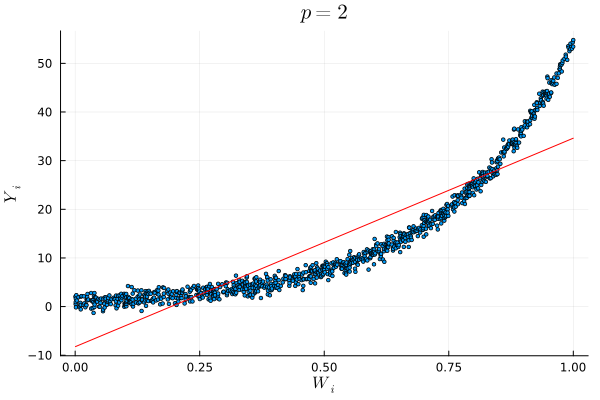

In [19]:
scatter(W,y, label = false,  ms=2)
plot!(W,y_hat, label = false, lc=:red)
xlabel!(L"W_i")
ylabel!(L"Y_i")
title!(L"p=2")

### Next, we fit a cuadratic curve to the data

In [21]:
W_2 = [W;; W.^2]
data = DataFrame([y;;W_2],["y","W","W2"])

Row,y,W,W2
,Float64,Float64,Float64
1,2.04781,0.000613745,3.76683e-7
2,0.499926,0.00102919,1.05924e-6
3,0.917251,0.00118453,1.40312e-6
4,1.63164,0.00132359,1.7519e-6
5,-0.156354,0.00156608,2.45262e-6
6,2.34442,0.00238898,5.70721e-6
7,1.24198,0.00327516,1.07266e-5
8,1.91775,0.00668238,4.46542e-5
9,0.0338681,0.0083837,7.02863e-5


In [22]:
model = lm(@formula(y~ W + W^2),data)
y_hat = predict(model,select(data,["W","W2"]));

### And plot the fitting curve

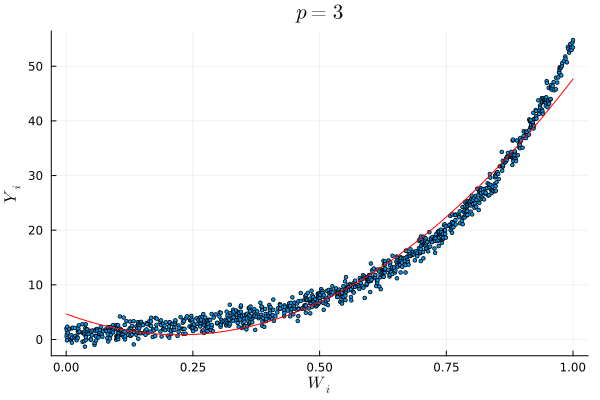

In [24]:
scatter(W,y, label = false,  ms=2)
plot!(W,y_hat, label = false, lc=:red)
xlabel!(L"W_i")
ylabel!(L"Y_i")
title!(L"p=3")

### Finally, we fit a cubic curve to the data

In [26]:
W_3 = [W_2;; W.^3]
data = DataFrame([y;;W_3],["y","W","W2","W3"])

Row,y,W,W2,W3
,Float64,Float64,Float64,Float64
1,2.04781,0.000613745,3.76683e-7,2.31187e-10
2,0.499926,0.00102919,1.05924e-6,1.09017e-9
3,0.917251,0.00118453,1.40312e-6,1.66205e-9
4,1.63164,0.00132359,1.7519e-6,2.3188e-9
5,-0.156354,0.00156608,2.45262e-6,3.841e-9
6,2.34442,0.00238898,5.70721e-6,1.36344e-8
7,1.24198,0.00327516,1.07266e-5,3.51314e-8
8,1.91775,0.00668238,4.46542e-5,2.98396e-7
9,0.0338681,0.0083837,7.02863e-5,5.89259e-7


In [27]:
model = lm(@formula(y~ W + W2 + W3),data)
y_hat = predict(model,select(data,["W","W2","W3"]));

### And plot the results

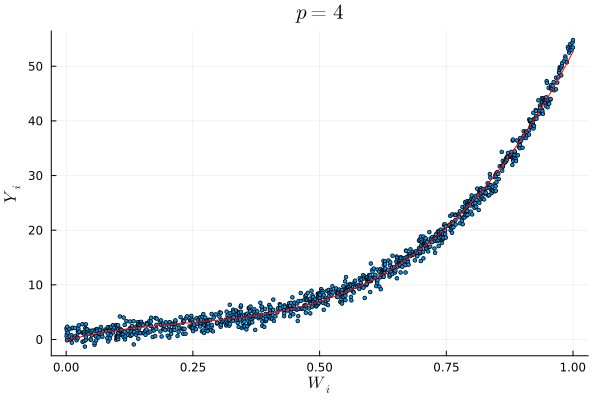

In [29]:
scatter(W,y, label = false,  ms=2)
plot!(W,y_hat, label = false, lc=:red)
xlabel!(L"W_i")
ylabel!(L"Y_i")
title!(L"p=4")

## 2. Overfitting

### As we did in R and Python, we first study the case where $p=n=1000$, so now we create the features and dependen variable randomly

In [32]:
X = randn(1000,1000-1);
y = randn(1000);
print(size(X)) 
print(size(y))

(1000, 999)(1000,)

In [33]:
data = DataFrame([y;;X],:auto)
rename!(data, :x1 => :y)

Row,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.764304,0.9511,-0.518754,1.22181,1.34207,0.0982201,-0.45513,1.2189,-1.55543,-0.260005,1.07155,0.393434,-0.786096,0.346215,-0.731252,0.0690343,0.337071,0.401214,0.846808,-0.481719,0.595198,-0.568653,-0.115592,-0.529108,0.205037,-0.157619,-0.265881,0.0230326,-1.48707,-0.740653,0.396301,-0.296718,1.53761,0.39552,-0.515942,-0.510608,-0.225378,-0.848296,1.41471,1.03304,-0.697301,-0.268289,0.320588,0.893426,0.346894,-1.50895,1.76609,-0.768373,-0.640967,0.946267,0.149328,-1.9828,0.365582,1.35076,2.06306,-1.65607,-1.16842,-0.90267,0.81795,1.46229,-1.43081,-0.295362,-0.851577,-0.276051,-0.332727,1.48044,-0.478469,-1.062,0.187075,0.522405,0.454536,0.0621795,-0.115621,1.41122,1.50394,-0.134054,-0.246046,-1.38822,0.550911,0.289444,-1.05782,-0.192278,0.712083,2.05271,0.590557,-0.606632,0.135196,0.841289,0.666961,-1.40204,-0.385993,0.421268,-0.539219,2.12624,1.38955,0.849848,-1.52729,-0.735281,0.735043,-0.438803,⋯
2,0.348249,1.02483,1.03017,-0.417183,-0.726593,-1.41365,-0.227205,-1.14578,-0.2131,0.425445,-0.454297,1.28493,-2.07832,0.801536,0.479551,-1.14223,0.0385995,-0.649228,-0.586619,-1.20509,1.27575,-1.94722,-0.579663,0.332046,-0.870308,0.399683,2.13818,-0.747731,-1.45407,-0.0703655,-0.77671,-2.02631,0.0944733,0.330265,0.732147,1.01484,0.49725,-0.756802,-0.102057,-0.833471,-1.39728,-1.08913,2.36657,1.26222,2.59292,-0.328276,-1.24639,-0.112406,0.427869,0.337117,-1.31626,-0.948277,-0.159859,1.2112,1.3841,0.700573,-1.08405,0.336446,-0.376102,-0.560566,-0.865725,-1.88454,-0.204009,1.16187,0.922222,0.708427,-1.30894,1.98605,2.1628,-1.92669,0.876052,-0.201346,-1.20888,0.210835,-0.441587,-1.29883,-0.886787,-0.073333,-0.404704,-0.74786,0.28164,-0.706195,0.811611,0.870277,1.03285,1.09203,0.783705,0.765885,0.473919,-0.556071,-2.01572,0.281324,-0.0493218,-0.780624,-2.99918,0.271865,-0.487783,0.259656,0.332318,-0.172108,⋯
3,1.40786,1.66724,-0.452584,0.805343,0.154814,-0.0618245,-0.0935405,-0.317972,-1.31187,0.966592,1.10571,0.615097,-0.161018,0.274321,0.632688,0.544381,-2.43502,0.485951,-1.56667,1.17596,0.756866,0.590924,0.0868717,0.342044,0.366854,-0.631309,-0.387492,0.0220945,-0.677328,-0.975333,-0.585504,-0.887446,0.126416,1.0823,0.735922,0.610936,-0.700337,0.321531,0.064247,0.540349,-1.11404,0.916115,-0.0882669,-1.45593,0.0715352,1.1874,0.102575,-0.524424,0.364796,0.264559,-0.103004,-0.249838,0.176105,1.10483,0.637682,0.812343,-2.43758,-0.690633,0.338329,0.144142,0.870138,0.38367,-1.13826,-2.22292,-0.699114,0.368151,-0.199146,-2.25031,-0.417027,-1.0176,0.789272,0.58072,1.4617,-0.0119261,0.156703,0.448416,-0.759503,0.688173,0.443499,0.683531,-0.138256,0.857873,1.27691,-1.41215,1.78364,-0.796756,0.702724,-1.19852,0.923505,0.641522,-2.17921,0.852492,0.199233,0.183976,-0.83595,-0.267624,-1.28729,1.32783,-0.0178271,-0.21664,⋯
4,1.4659,0.75204,0.288444,-0.233146,0.76126

### In Julia's "lm" function, there is not an integrated command to regress the dependent variable on all the features. And we need it because there are 999 features + constant. So, we sort this problem out with a function called "term"

In [35]:
covariates = names(data)[2:end]
model = lm(term(:y) ~ sum(term.(covariates)), data);

### And now we calculate the MSE

In [37]:
mse = mean((y-predict(model,select(data,covariates))).^2)

2.9682769598271464e-26

### and the R-squared

In [39]:
R_sq = 1 - mse / mean((y.-mean(y)).^2)

1.0

### Then we study the case where $p=\frac{n}{2}=500$

In [41]:
X = randn(1000,500-1);
data = DataFrame([y;;X],:auto)
rename!(data, :x1 => :y)

Row,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.764304,-0.453057,0.990372,-0.91265,0.0220833,-0.867142,1.69496,1.46693,0.26074,-1.14419,1.62403,1.25036,-0.977633,-0.549739,-0.0383284,1.11758,-0.0782647,-0.378016,0.372496,-1.55582,1.49167,-0.0637135,-0.835029,0.256798,1.50101,-1.31336,-2.81514,-1.73085,-0.528273,0.987287,0.531135,0.505463,-0.130568,-0.275061,-0.682105,-0.975582,0.589054,0.665054,0.8426,2.35972,-0.0481582,-1.07001,-1.31933,-1.22451,0.625087,-0.863843,-1.72252,-0.332421,-1.59089,1.31444,1.65043,0.605673,0.854228,-0.327264,-0.480209,-1.79466,1.68298,0.228643,-0.827841,-1.45037,0.258232,0.729102,0.608572,0.616858,0.141694,0.0980362,-0.162738,0.170988,-1.05113,1.21946,1.43359,-0.627675,-1.54946,0.635376,-0.163425,-1.99045,-0.708222,0.196209,1.18748,0.828878,0.925246,-1.11606,1.20955,0.75043,-1.49718,0.307417,-0.391927,0.60945,0.517528,-0.79517,-1.40415,-1.99499,0.641714,0.983884,1.19778,-0.127137,-0.0041199,-1.2807,0.625192,-1.28152,⋯
2,0.348249,-0.385377,-0.132215,0.338614,0.31858,-0.858322,1.03952,-1.41424,-0.694728,0.14661,-1.39038,0.438916,0.340381,-1.21019,0.482182,-0.20608,-0.311895,0.729913,-1.93277,-0.149997,-0.611312,-0.36577,0.884409,-0.636268,0.58654,0.0434233,1.05627,-1.82783,0.0164203,0.574782,-0.00293288,0.562283,0.215458,-1.25717,0.371694,-1.43815,0.0179625,-3.28605,1.20003,-0.137284,0.277782,1.19743,0.840322,-1.65327,-1.25402,-0.388776,-0.968454,-0.86181,-1.48009,1.6369,1.84278,-0.254735,-0.12241,0.308734,-0.985728,0.971736,1.5959,-1.21885,0.0832762,0.0107483,0.75416,0.465536,-1.05241,-0.0490424,1.40469,0.287215,-0.389574,0.185142,1.04175,-0.806902,-0.37151,1.00413,-0.392017,-1.14183,-0.576232,-0.442463,0.841241,0.888925,0.303352,-0.763787,-0.151564,0.534994,-1.06604,-0.487717,-0.136527,0.420082,-0.652245,-1.15543,-0.364093,1.89713,0.428483,-1.45776,0.587753,1.40699,-0.667365,1.25244,1.03539,0.203438,-0.720103,-1.3792,⋯
3,1.40786,1.12075,0.183007,0.603377,1.00676,-1.75042,-1.17676,-0.0556466,1.53078,1.24998,-0.476983,0.634211,0.486843,-0.0223474,-1.15004,-1.40996,-0.0350297,-1.12985,-1.22037,0.787313,-1.40182,-1.27231,-0.666315,1.02938,1.45165,0.551073,-0.105369,-0.451791,1.57978,1.01381,-0.0742305,-0.0409587,-0.00945995,-0.0934579,1.96919,0.894267,0.0893671,0.272736,-0.803696,0.887277,-0.213142,-2.29382,1.39121,0.206373,0.664996,0.214878,-0.0960715,0.89009,-0.754557,0.205862,-1.50344,0.892912,-0.534595,0.726534,-0.170206,1.13866,0.529611,1.80548,-0.573192,0.46866,-0.865264,-0.347149,1.45622,-0.304932,0.611218,1.4103,0.259449,-1.74386,1.60873,-1.25024,1.47759,-0.450336,-1.01807,-1.00525,-0.0260721,1.81525,1.42265,-0.45322,0.459532,-0.813996,0.477161,0.0384856,0.62263,0.13544,-0.343668,-0.0231892,-1.0428,-0.730574,0.564951,0.0390518,-1.14157,0.533904,-0.283242,1.19026,-0.649708,0.567289,0.873293,1.01886,-0.317092,0.0931068,⋯
4,1.4659,0.7208,-0.657218,0.615878,0.42301

### We fit the model

In [43]:
covariates = names(data)[2:end]
model = lm(term(:y) ~ sum(term.(covariates)), data);

### Calculate the MSE

In [45]:
mse = mean((y-predict(model,select(data,covariates))).^2)

0.48522732452679146

### The R-squared

In [47]:
R_sq = 1 - mse / mean((y.-mean(y)).^2)

0.4836175533835667

### And the adjusted R-squared

In [49]:
adj_mse = 1000/500*mse
adjR_sq = 1 - adj_mse / mean((y.-mean(y)).^2)
adjR_sq

-0.032764893232866577

### Finally, we study the case where $p=\frac{n}{20}=50$

In [51]:
X = randn(1000,50-1);
data = DataFrame([y;;X],:auto)
rename!(data, :x1 => :y)

Row,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.764304,-0.561066,-0.974139,-0.548166,-0.642237,-0.702808,0.428768,-0.780281,-0.440488,-1.88639,-1.5534,0.600631,1.13771,2.40673,-1.7988,-1.00575,-0.197297,0.237094,0.974355,-0.0842346,0.532922,1.75865,1.38972,3.20183,-0.638038,0.696061,-1.37927,0.193797,1.1038,0.0624423,1.5178,0.177594,0.878508,0.421514,0.102367,-0.216327,0.547828,2.41414,-0.822224,1.2429,-0.164269,0.558669,1.36824,0.202294,1.5492,1.22332,0.885909,1.03996,0.613885,1.33434
2,0.348249,-0.514139,-0.224067,-2.70703,-0.139867,0.334016,1.94381,-0.38855,-2.0551,0.873965,0.23624,0.998609,-0.846971,-0.379387,1.25785,-0.19053,-1.00995,0.181211,-0.183486,-0.30019,0.505477,-0.650605,0.098898,-0.375506,0.824541,-0.129666,0.942287,1.11661,-0.0209948,0.724886,0.536294,1.21997,0.192113,0.0573151,1.11088,0.622013,0.736352,-0.107203,-0.420295,0.169854,1.09261,1.47399,0.347319,-0.422557,2.88395,0.457658,0.708004,-0.261012,1.88098,-0.768266
3,1.40786,1.30091,-0.654309,-0.989037,-0.146238,-1.27405,0.44046,-1.11531,-0.894482,0.192514,0.304912,0.951426,-0.757405,-1.41459,0.898176,1.05201,-0.207652,0.691744,0.202331,0.110736,-0.953901,0.221526,-1.98317,0.0139345,-0.262319,0.481412,-0.149774,-0.0398437,-0.27184,-0.288374,0.381248,1.19461,1.95249,0.50582,0.154336,-0.923932,-2.06076,1.01993,0.544508,0.736185,-0.423435,-0.843776,-0.764288,0.652696,0.0507616,-0.929794,-0.854236,0.874583,-0.407685,-0.563506
4,1.4659,1.3451,-0.531287,2.09743,0.795818,-0.475701,-1.13708,-1.311,-1.81377,-0.462662,0.298541,0.371317,-0.835201,0.434957,0.0765477,-0.50299,1.46571,-0.90854,-0.872799,-0.452473,-0.625311,-0.153793,-1.12103,1.36017,-1.14992,-1.82693,-0.195888,-0.117282,-1.99473,1.22425,0.178682,-1.12892,-0.412789,0.522794,0.613525,1.19806,-1.11006,0.382551,1.08982,1.39334,0.833469,0.273732,-0.175581,-0.564346,-0.0568085,-0.379929,0.520732,-0.843037,1.40573,-0.347844
5,-0.373752,-2.08389,1.36544,0.065976,-0.477013,1.00699,0.470759,0.321511,-1.43558,-0.86486,1.61205,0.922112,1.9797,1.03761,-1.01492,0.157782,-1.32801,2.46729,-1.61749,0.264441,-2.6787,-0.172607,-1.72952,-0.702501,-0.319503,1.45803,-1.56582,1.1993,-0.977306,-0.214861,-1.06816,-0.0679171,2.37526,-0.290513,1.19949,0.667696,0.433943,1.23737,0.258717,-0.208562,0.0187769,0.851202,0.0904191,-0.227466,1.47259,-0.508598,0.862853,1.2254,0.678277,0.609561
6,1.41003,0.975555,0.704307,0.98131,2.0406,-1.65316,0.582981,0.0134791,0.401765,0.509402,0.854676,-0.412121,0.152291,-0.31641,1.25348,-1.61935,-1.3674,-0.896722,1.25088,-1.19374,-0.0678797,1.25925,1.20991,-0.0431224,0.512862,0.0412013,0.8286,0.744415,-0.174485,-0.583382,0.472332,-0.698298,-1.4452,-0.0204769,0.602414,-1.39847,-1.04787,0.0303668,-1.6681,-0.105261,-1.55324,1.56092,0.698784,-0.590317,-2.60763,-0.206993,0.0507619,2.06462,1.02928,-2.12268
7,2.45033,0.391343,0.493298,-1.21832,0.534512,-0.043474,-1.7055,-0.91553,1.44922,-0.399459,-0.207961,-1.23687,-0.132559,-1.09482,-2.82647,-0.484987,-0.143226,-0.217362,-0.573622,0.806576,-0.585814,0.797624,0.590774,-0.970986,0.684729,-0.388649,-0.139819,1.39308,-0.743236,-0.302292,0.0919879,-0.0517087,0.119893,-0.595471,-1.09,0.738978,-1.30888,-0.727241,0.595601,1.11937,-2.63685,0.550255,-1.35628,0.565567,2.14008,0.670471,-1.55061,-0.418357,0.168993,-1.32067
8,-1.8416,-2.44575,-1.22735,0.155531,-0.109511,0.215816,0.318626,0.95138,-0.832286,0.0216024,-0.799857,-0.266553,-0.304325,1.17227,1.48117,1.4404,1.05314,-0.912917,0.609937,0.390576,0.184187,-0.605021,1.03094,

In [52]:
covariates = names(data)[2:end]
model = lm(term(:y) ~ sum(term.(covariates)), data);

### Calculate the MSE

In [54]:
mse = mean((y-predict(model,select(data,covariates))).^2)

0.8913762807204477

### R-squared

In [56]:
R_sq = 1 - mse / mean((y.-mean(y)).^2)

0.0513908812881233

### And adjusted R-squared

In [58]:
adj_mse = 1000/500*mse
adjR_sq = 1 - adj_mse / mean((y.-mean(y)).^2)
adjR_sq

-0.8972182374237534

## 3. Data splitting

### In the final section, we perform data splitting in Julia. As we did previously, we will work with the data generating process of section 1.

In [61]:
# Features

W = rand(Float64,1000);
W = sort(W);

# Noise

e = randn(1000);

# Dependent variable

y = exp.(4W) + e;

### Now we store all the data in dataframes

In [63]:
W_1 = W;
W_2 = [W;; W.^2];
W_3 = sin.(W);

data_1 = DataFrame([y;;W_1],["y", "W"]);
data_2 = DataFrame([y;;W_2],["y", "W", "W2"]);
data_3 = DataFrame([y;;W_3],["y", "sinW"]);

### In this case, we are going to build our data splitter. Our data splitter is going to work as follows: we will input the dataframe and the proportion ($\alpha$) of the data that we want for training. Given those arguments, we will sample $\alpha n$ indexes of the dataset randomly without replacement, and keep the observations with those indexes. That will be our training sample. Then, we will select the remaining data as test sample.

In [65]:
function datasplitting(data,proportion)

    sampling = sample([1:size(data,1);],Int(proportion*size(data,1)),replace=false) #sample indexes
    sampling = sort(sampling) # sort index
    train = data[sampling,:] # subset of dataframe with sampled indexes -> train set
    remaining = [i for i in 1:size(data,1) if isempty(searchsorted(sampling, i))] #remaining indexes of the data frame
    test = data[remaining, :] #s ubset of dataframe with remaining indexes -> test set

    return train, test
end   

datasplitting (generic function with 1 method)

### With the built function, we apply it to the three datasets

In [111]:
using StatsBase

In [113]:
train_1, test_1 = datasplitting(data_1,0.75);
train_2, test_2 = datasplitting(data_2,0.75);
train_3, test_3 = datasplitting(data_3,0.75);

### Fit the model with each training sample

In [116]:
model_1 = lm(@formula(y~W), train_1);
model_2 = lm(@formula(y~W+W2), train_2);
model_3 = lm(@formula(y~ sinW), train_3);


### Build auxiliar variables to calculate goodness of fit measures

In [118]:
y_1_test = test_1[:,"y"];
y_2_test = test_2[:,"y"];
y_3_test = test_3[:,"y"];

In [119]:
y_1_hat_test = predict(model_1,select(test_1,"W"));
y_2_hat_test = predict(model_2,select(test_2,["W","W2"]));
y_3_hat_test = predict(model_3,select(test_3,"sinW"));

In [120]:
mse_1_test = mean((y_1_test - y_1_hat_test).^2)
mse_2_test = mean((y_2_test - y_2_hat_test).^2)
mse_3_test = mean((y_3_test - y_3_hat_test).^2)

48.67097108204022

In [121]:
R_sq_1_test = 1 - mse_1_test/mean((y_1_test.-mean(y_1_test)).^2)
R_sq_2_test = 1 - mse_2_test/mean((y_2_test.-mean(y_2_test)).^2)
R_sq_3_test = 1 - mse_3_test/mean((y_3_test.-mean(y_3_test)).^2)

0.7317201528258233

### And calculate them

In [123]:
# MSE

mse_1_test = mean((y_1_test - y_1_hat_test).^2)
mse_2_test = mean((y_2_test - y_2_hat_test).^2)
mse_3_test = mean((y_3_test - y_3_hat_test).^2)

println("MSE out of sample of predictor 1 is $mse_1_test")
println("MSE out of sample of predictor 2 is $mse_2_test")
println("MSE out of sample of predictor 3 is $mse_3_test")

# R-squared

R_sq_1_test = 1 - mse_1_test/mean((y_1_test.-mean(y_1_test)).^2)
R_sq_2_test = 1 - mse_2_test/mean((y_2_test.-mean(y_2_test)).^2)
R_sq_3_test = 1 - mse_3_test/mean((y_3_test.-mean(y_3_test)).^2)

println("R-squared out of sample of predictor 1 is $R_sq_1_test")
println("R-squared out of sample of predictor 2 is $R_sq_2_test")
println("R-squared out of sample of predictor 3 is $R_sq_3_test")

# Adjusted R-squared

adj_mse_1_test = 250 / (250-2) * mse_1_test
adjR_sq_1_test = 1 - adj_mse_1_test / mean((y_1_test.-mean(y_1_test)).^2)

adj_mse_2_test = 250 / (250-3) * mse_2_test
adjR_sq_2_test = 1 - adj_mse_2_test / mean((y_2_test.-mean(y_2_test)).^2)

adj_mse_3_test = 250 / (250-2) * mse_3_test
adjR_sq_3_test = 1 - adj_mse_3_test / mean((y_3_test.-mean(y_3_test)).^2)

println("Adjusted R-squared out of sample of predictor 1 is $adjR_sq_1_test")
println("Adjusted R-squared out of sample of predictor 2 is $adjR_sq_2_test")
println("Adjusted R-squared out of sample of predictor 3 is $adjR_sq_3_test")

MSE out of sample of predictor 1 is 38.80907429006048
MSE out of sample of predictor 2 is 4.20629262919359
MSE out of sample of predictor 3 is 48.67097108204022
R-squared out of sample of predictor 1 is 0.7852877847408799
R-squared out of sample of predictor 2 is 0.9778785151130942
R-squared out of sample of predictor 3 is 0.7317201528258233
Adjusted R-squared out of sample of predictor 1 is 0.7835562346178224
Adjusted R-squared out of sample of predictor 2 is 0.9776098331104193
Adjusted R-squared out of sample of predictor 3 is 0.7295566056711928
